In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from os import path
import matplotlib.pylab as plt

from dual_controller_model_figures.plot import plot_functions as pf

In [2]:
repo_path = path.abspath('.')

# output path for the plots
out_path = path.join(repo_path, 'output_plots')

# read the data
dual_model_file = path.join(repo_path, 'data/Intact_reward_100trails_1000timesteps.csv')
rpe_model_file = path.join(repo_path, 'data/NoTail_reward_100trails_1000timesteps.csv')
ape_model_file = path.join(repo_path, 'data/NoDorsal_reward_100trails_1000timesteps.csv')

dual_model = pd.read_csv(dual_model_file, header=None).to_numpy()
rpe_model = pd.read_csv(rpe_model_file, header=None).to_numpy()
ape_model = pd.read_csv(ape_model_file, header=None).to_numpy()

In [3]:
# cut the number of trials and adjust performance to 100
max_trials = 300
dual_model = np.array([100 * x[0:max_trials] for x in dual_model])
ape_model = np.array([100 * x[0:max_trials] for x in ape_model])
rpe_model = np.array([100 * x[0:max_trials] for x in rpe_model])

In [4]:
# rescale to match the 5000 experimental data
exp_data_ntrials = 5000
rescale_factor = int(np.ceil(exp_data_ntrials / max_trials))

xs = np.arange(0, max_trials)*rescale_factor

No handles with labels found to put in legend.


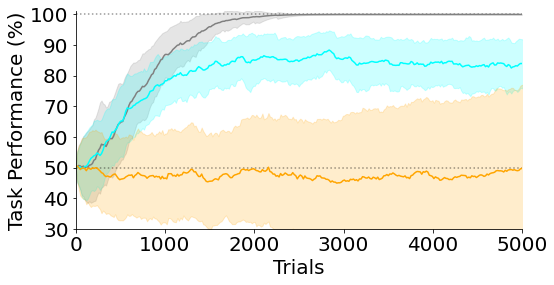

In [5]:
# continous monitoring of learning
fig1 = pf.make_figure_learning_across_trials(dual_model, rpe_model, ape_model, xs)
fig1.show()

# TODO: add vertical lines for when we do innactivations

plt.savefig(path.join(out_path, 'Performance_between_groups.pdf'),
            transparent=True, bbox_inches='tight')

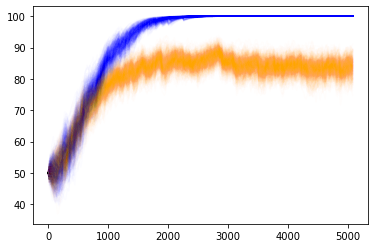

In [6]:
# there are some weird irregularities in the datasets:
# all the agents behave similar overall
dms = dual_model.copy()
rms = rpe_model.copy()
for i in range(500):
    np.random.shuffle(dms)
    np.random.shuffle(rms)
    plt.plot(xs, np.mean(dms[0:10, ], axis=0), color='blue', alpha=.01)
    plt.plot(xs, np.mean(rms[0:10, ], axis=0), color='orange', alpha=.01)

In [20]:
# Subselect X agents to match experimental
n_agents = 10

dms = dual_model.copy()
rms = rpe_model.copy()

np.random.shuffle(dms)
dms = dms[0:n_agents, ]
np.random.shuffle(rms)
dms = dms[0:n_agents, ]


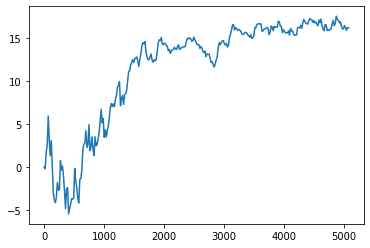

In [21]:
# plot differences
model_diffs = np.mean(dms, axis=0) - np.mean(rms, axis=0)
plt.plot(xs, model_diffs)
plt.show()

In [22]:
# # do this several times to see how the randomness behaves
# n_agents = 10

# for i in range(50):
#     dms = dual_model.copy()
#     rms = rpe_model.copy()

#     np.random.shuffle(dms)
#     dms = dms[0:n_agents, ]
#     np.random.shuffle(rms)
#     rms = rms[0:n_agents, ]
#     # plot differences
#     model_diffs = np.mean(dms, axis=0) - np.mean(rms, axis=0)
#     plt.plot(xs, model_diffs, alpha=.1, color='k')
# plt.show()

In [23]:
# create shuffles of the data and calculate the
# differences of the means. Create a shuffled array of means
n_times = 1000
rows, cols = dms.shape
shuffled_arr = np.empty([n_times, cols])
# mix both models
mixed = np.concatenate([dms, rms])
for i in range(n_times):
    # shuffle and split in half
    np.random.shuffle(mixed)
    mean1 = np.mean(mixed[0:rows, ], axis=0)
    mean2 = np.mean(mixed[rows:, ], axis=0)
    shuffled_arr[i, :] = mean1 - mean2

In [24]:
# calculate confidence intervals
top_ci = np.quantile(shuffled_arr, .95, axis=0)
bot_ci = np.quantile(shuffled_arr, .05, axis=0)

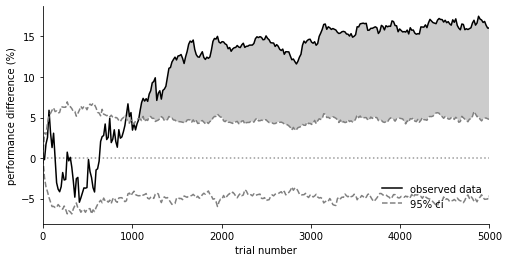

In [25]:
# plot
fig2 = plt.figure(figsize=(8, 4))
plt.axhline(0, ls='dotted', alpha=0.4, color='k')
plt.plot(xs, model_diffs, color='k', label='observed data')
plt.plot(xs, top_ci, linestyle='--', color='gray', label='95% ci')
plt.plot(xs, bot_ci, linestyle='--', color='gray')
plt.fill_between(xs, top_ci, model_diffs, where=model_diffs >= top_ci,
                 facecolor='k', alpha=.2, interpolate=True)
plt.ylabel('performance difference (%)')
plt.xlabel('trial number')
plt.legend(loc=(0.75, 0.05), frameon=False)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim((0,5000))

plt.savefig(path.join(out_path, 'Differences_of_means_significance.pdf')
            ,transparent=True, bbox_inches='tight')
fig2.show()